# **TITANIC ML MODEL**
# This is a machine learning model to predict the Titanic survivals

In [154]:
# For auto complete
%config Completer.use_jedi = False

In [155]:
# Used libraries imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# For K-Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# **1. DATA EXPLORATION**
## Upon exploring the training data, we can conclude some observations for pre-processing

In [156]:
# Reading data
titanic_data_path = "../input/titanic/train.csv"
# td stands for titanic_data for ease of use
td = pd.read_csv(titanic_data_path)

In [157]:
# Explore data discription
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
# Explore data heads
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
# Explore all data
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **2. PRE-PROCESSING AND FEATURE ENGINEERING**
## Majorly focus on two aspects:
### 2.1. Handling missing (NULL) values.
### 2.2. Conclude new (better for prediction) features from existing ones.
### 2.3. Code the nominal values with numbers.

## **2.1. Handling Missing Values**

In [160]:
# Exploring Null values
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### We have two features with NULL values:
#### 1. The "Age" --->>> cannot ignore (drop) null values --->>> fill using mean or median
#### 2. The Cabin --->>> too much missing values to handle, null values exceeds available data --->>> feature not picked

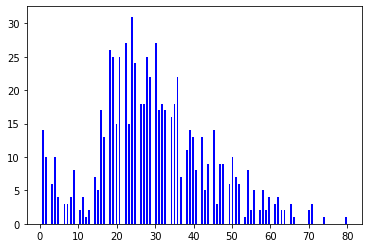

In [161]:
# Handling "Age" null values

# Using data visualization, explore data distribution to assert the use of mean
ages = td.Age
bins = 100
plt.hist(ages, bins, color = 'blue',histtype = 'bar', rwidth = 0.6)
plt.show()

### We conclude that the "Age" data is well distributed.
### Hence we can use the mean to fill the missing values.

In [162]:
# Replace missing (null) values in Age with mean
td.Age.replace(np.NaN, int(td.Age.mean()), inplace = True)

# Check there is no missing values
print("Age missing values sum =", td.Age.isnull().sum())

Age missing values sum = 0


## **2.2. Conclude New Features**
### There are some features that can be deduced from the data:
#### 1. A "Mrs." in a female's name indicates that she is married, and to whom.
#### 2. The no. of siblings a person has plus his paretnts gives the total family he has on board.
#### 3. And so on.
### Now, I cannot tell if these deduced data are usefull for prediction, but we shall see when picking features.

In [163]:
# Create and insert the family column
family_on_board = td.SibSp + td.Parch
td.insert(loc = 12, column = "Family", value = family_on_board, allow_duplicates = False)

## **2.3. Code The Nominal Values With Numbers**
### For the prediction model to run, we need the data to be numric:
#### 1. Gender: male = 1 ... female = 0
#### 2. Embarked: C = 0 ... Q = 1 ... S = 2

In [164]:
# Replace Sex
td.Sex.replace("male", 1, inplace = True)
td.Sex.replace("female", 0, inplace = True)

# Replace Embarked
td.Embarked.replace("C", 0, inplace = True)
td.Embarked.replace("Q", 1, inplace = True)
td.Embarked.replace("S", 2, inplace = True)
td.Embarked.replace(np.NaN, 2, inplace = True)

## Now that the pre-processing is done, we take a look at the data.

In [165]:
td

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,W./C. 6607,23.4500,NaN,2.0,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0.0,0


# **3. ML MODEL**
## To build the final model, we shall go through two major steps:
### 3.1. Picking features.
### 3.2. Constructing the model.
### 3.3. K-Cross validation.
### 3.3. Model evaluation.

## **3.1. Picking The Prediction Features**
### We simply need to examine how much each attribute affects the prediction target "Survived".
### Then we pick the candidate features.
### To do so, I will use correlation as a measure of that effect.

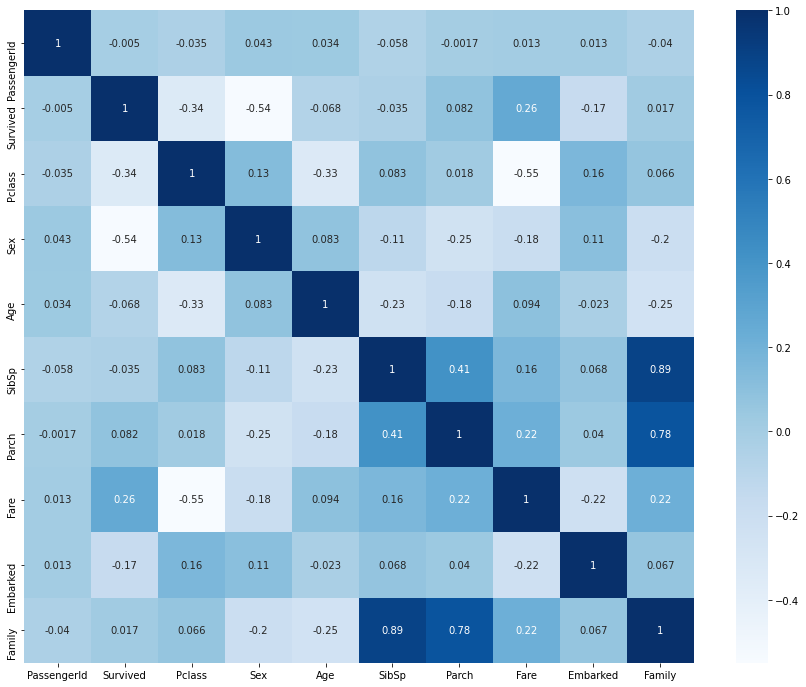

In [166]:
# Using data visualization
# Correlation matrix between attributes
# Illustrated by a heat map
attributes_correlation = td.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(attributes_correlation, annot = True, cmap = 'Blues')
plt.show()

## **3.2. Constructing The Model**
### To construct the model, we shall:
#### 1. Pick the prediction features using corralation data.
#### 2. Define the model to build.
#### 3. Fit the model with training data.
### We shall create more than one model, and then compare their scores using K-Cross validation method.
### 3 models created: Decision Tree, SVM, and Ramdom Forest.

In [167]:
# Picking prediction features
prediction_target = td.Survived
picked_features = ['Pclass', 'Age', 'Sex', 'Embarked', 'Family']
prediction_features = td[picked_features]

# Build the models

# Decision Tree
DT_titanic_model = DecisionTreeClassifier(random_state=1)
# SVM
SVM_titanic_model = SVC();

# Random forest
# Using Hyper Parameter Tuning
RF_titanic_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, min_samples_leaf = 1, min_samples_split = 2, random_state = 42, max_features = 'auto', max_leaf_nodes = None)

# --->>> The Hyper Parameters
#
# Recap that the random forest is just a more sophisticated decision tree model that uses many trees
# and then makes a prediction by averaging the predictions of each component tree
#
# n_estimators: is the number of decision trees used for prediction in the forrest
# max_depth: max depth per tree (no. of levels)
#
# Recap the overfitting and underfitting problems due to over or lack of fine-grianed leaf nodes (Decision nodes)
#
# min_samples_leaf: minimum number of data elements in a leaf node
# min_samples_split: minimum number of data elements in a node before being split
# max_features: maximum number of predicting features to be considered while splitting a node

## **3.3. K-Cross Validation**
### To put it clear, the K-Cross validation process simply does the following:
#### 1. Split the data into training and evaluation (test) data.
#### 2. Using the training data, each model makes predictions.
#### 3. Based on the evaluation data, each model is given a score.
#### 4. The score simply is the average (mean) of the predictions.
#### 5. Note that the number of predictions made (the n_split parameter is adjustable in the KFold function.
#### 6. By comparing the models scores, we shall pick the highest (most accurate one)

In [168]:
# Define the K-Cross function and no. of splits to be 25
K_Cross = KFold(n_splits=25, shuffle=True, random_state=1)
scoring_methodology = 'accuracy'

# Get a score for each model
# Decision tree
DT_score = cross_val_score(DT_titanic_model, prediction_features, prediction_target, cv=K_Cross, n_jobs=1, scoring=scoring_methodology)
# SVM
SVM_score = cross_val_score(SVM_titanic_model, prediction_features, prediction_target, cv=K_Cross, n_jobs=1, scoring=scoring_methodology)
# Random forest
RF_score = cross_val_score(RF_titanic_model, prediction_features, prediction_target, cv=K_Cross, n_jobs=1, scoring=scoring_methodology)

# Score comparison
# Print each model score rounded by 4 dicimal digits
DT_score = round(np.mean(DT_score)*100, 4)
SVM_score = round(np.mean(SVM_score)*100, 4)
RF_score = round(np.mean(RF_score)*100, 4)

print("Decision tree model score =", DT_score)
print("SVM model score =", SVM_score)
print("Random forest model score =", RF_score)

Decision tree model score = 78.0222
SVM model score = 64.1175
Random forest model score = 81.8444


### It's obvious that the Random forest model has the high score, so we shall proceed with it.
### Fit the model with the training data, then evaluate it against the test file.

In [169]:
# Fit the random forest model
RF_titanic_model.fit(prediction_features, prediction_target)

RandomForestClassifier(max_depth=5, random_state=42)

## **3.4. Model Evaluation**
### Using the test data - after applying the same pre-processing, we can evaluate the model by making predictions.

In [170]:
# Read data
test_data_path = "../input/titanic/test.csv"
# ttd stands for titanic test data
ttd = pd.read_csv(test_data_path)

# Pre-processing
ttd.Age.replace(np.NaN, int(td.Age.mean()), inplace = True)
test_family_on_board = ttd.SibSp + ttd.Parch
ttd.insert(loc = 11, column = "Family", value = test_family_on_board, allow_duplicates = False)
ttd.Sex.replace("male", 1, inplace = True)
ttd.Sex.replace("female", 0, inplace = True)
ttd.Embarked.replace("C", 0, inplace = True)
ttd.Embarked.replace("Q", 1, inplace = True)
ttd.Embarked.replace("S", 2, inplace = True)
ttd.Embarked.replace(np.NaN, 2, inplace = True)

# Picking prediction test features
prediction_test_features = ttd[picked_features]

# Make predictions using the model
my_model_predictions = RF_titanic_model.predict(prediction_test_features)

# Save predictions as pandas dataframe for testing
predictions_output = pd.DataFrame({'PassengerId': ttd.PassengerId, 'Survived': my_model_predictions})
predictions_output.to_csv('17P8113_predictions_submission.csv', index = False)